## Jupyter notebook for illustrating the change of TADs and A/B compartments

This notebook is the code for producing the change of fractions in 
TADs, compartment As and compartment Bs as illustrated in Supplementary Fig. 7 in the paper **"Analysis of chromatin organinization and gene expression in T cells identifies functional genes for rheumatoid arthritis"** 
by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre*.

Author : *Jing Yang*  <br />
Date: 01/05/2020 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
TADS_percentage <- read.table('data/TADS_percent_0.9.txt')

Acompartment_percentage <- read.table('data/Acompartment_percent_f0.9.txt')
Bcompartment_percentage <- read.table('data/Bcompartment_percent_f0.9.txt')

In [5]:
TADS_data <- matrix(TADS_percentage[,2], nrow=9)
Acompartment_data <- matrix(Acompartment_percentage[,2], nrow=9)
Bcompartment_data <- matrix(Bcompartment_percentage[,2], nrow=9)


In [6]:
TADS_no24hr <- TADS_percentage[!grepl('24H',TADS_percentage$V1),]
TADS_24hr <- TADS_percentage[grepl('24H',TADS_percentage$V1),]
Acompartment_no24hr <- Acompartment_percentage[!grepl('24H',Acompartment_percentage$V1),]
Acompartment_24hr <- Acompartment_percentage[grepl('24H',Acompartment_percentage$V1),]
Bcompartment_no24hr <- Bcompartment_percentage[!grepl('24H',Bcompartment_percentage$V1),]
Bcompartment_24hr <- Bcompartment_percentage[grepl('24H',Bcompartment_percentage$V1),]

In [7]:
colnames(TADS_data) <- c('T01','T201','T1H1','T4H1','T24H1','T02','T202','T1H2','T4H2')
rownames(TADS_data) <- c('T01','T02','T201','T202','T1H1','T1H2','T4H1','T4H2','T24H1')
colnames(Acompartment_data) <- c('T01','T201','T1H1','T4H1','T24H1','T02','T202','T1H2','T4H2')
rownames(Acompartment_data) <- c('T01','T02','T201','T202','T1H1','T1H2','T4H1','T4H2','T24H1')
colnames(Bcompartment_data) <- c('T01','T201','T1H1','T4H1','T24H1','T02','T202','T1H2','T4H2')
rownames(Bcompartment_data) <- c('T01','T02','T201','T202','T1H1','T1H2','T4H1','T4H2','T24H1')

In [8]:
idx_x <- c('T01','T02','T201','T202','T1H1','T1H2','T4H1','T4H2','T24H1')

In [9]:
TADS_new <- TADS_data[,c('T01','T02','T201','T202','T1H1','T1H2','T4H1','T4H2','T24H1')]
Acompartment_new <- Acompartment_data[,c('T01','T02','T201','T202','T1H1','T1H2','T4H1','T4H2','T24H1')]
Bcompartment_new <- Bcompartment_data[,c('T01','T02','T201','T202','T1H1','T1H2','T4H1','T4H2','T24H1')]


In [10]:
TADS_forplot<- expand.grid(x=idx_x, y=idx_x) 
Acompartment_forplot<- expand.grid(x=idx_x, y=idx_x) 
Bcompartment_forplot<- expand.grid(x=idx_x, y=idx_x) 


In [11]:
TADS_forplot$z <- as.list(TADS_new)
Acompartment_forplot$z <- as.list(Acompartment_new)
Bcompartment_forplot$z <- as.list(Bcompartment_new)
TADS_forplot$label <- 'TADS'
Acompartment_forplot$label <- 'Compartment A'
Bcompartment_forplot$label <- 'Compartment B'

In [12]:
data_forplot <- rbind(TADS_forplot, Acompartment_forplot, Bcompartment_forplot)

In [13]:
head(data_forplot)

,x,y,z,label
,<fct>,<fct>,<list>,<chr>
1,T01,T01,1,TADS
2,T02,T01,0.831,TADS
3,T201,T01,0.84,TADS
4,T202,T01,0.823,TADS
5,T1H1,T01,0.815,TADS
6,T1H2,T01,0.823,TADS


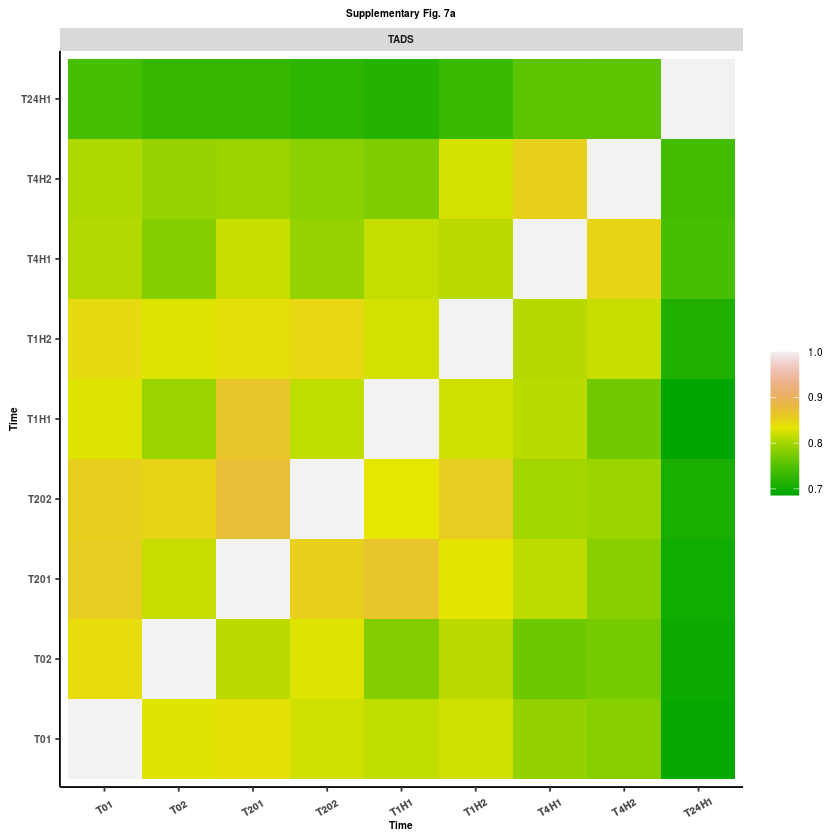

In [14]:
ggplot(data=subset(data_forplot, data_forplot$label %in% 'TADS'), aes(x=x,y=y, z=as.numeric(z), fill=as.numeric(z), group=label)) + geom_raster( hjust=0.5, vjust=0.5) + 
  scale_fill_gradientn(colours = terrain.colors(20)) + xlab('Time') + ylab('Time') + theme(
  # Remove panel borde
  #panel.border = element_blank(),  
  # Remove panel grid lines
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Remove panel background
  panel.background = element_blank(),
  # Add axis line
  legend.title=element_blank(),legend.text=element_text(size=6),legend.position='right',
  axis.title=element_text(size=6,face="bold", hjust=0.5),
  plot.title=element_text(size=6,face="bold", hjust=0.5),

  axis.text.x = element_text(hjust = 0.5, vjust=0.5, size=6, face="bold", angle=30),
  axis.text.y = element_text(size=6, face="bold"),
  strip.text = element_text(size=6, face="bold"),
  axis.line = element_line(colour = "black")) + ggtitle('Supplementary Fig. 7a') + facet_grid(.~label)


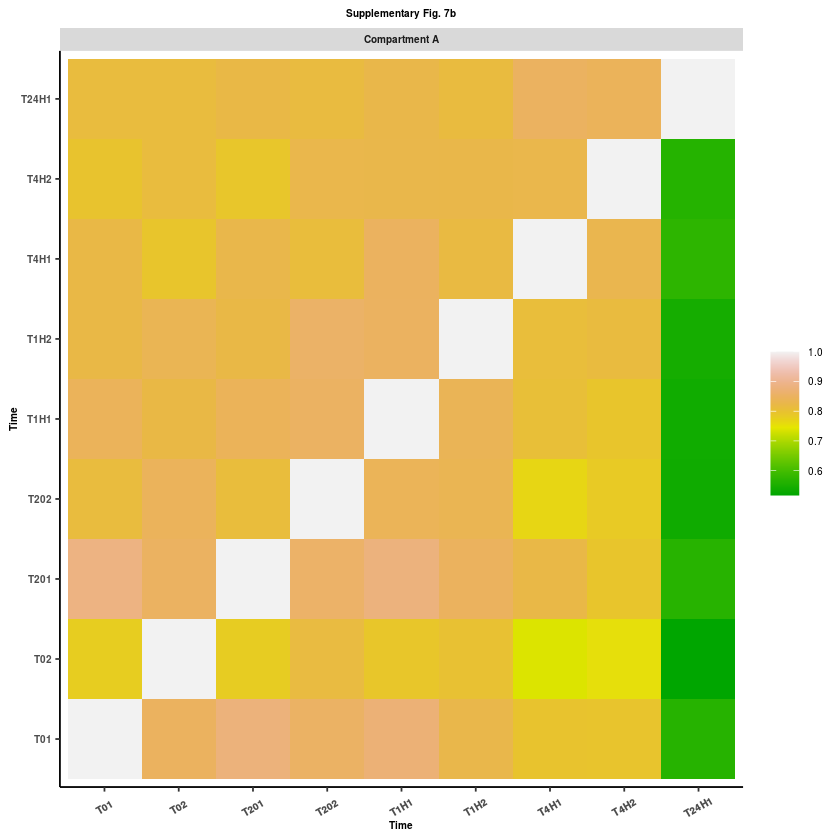

In [15]:
ggplot(data=subset(data_forplot, data_forplot$label %in% 'Compartment A'), aes(x=x,y=y, z=as.numeric(z), fill=as.numeric(z), group=label)) + geom_raster( hjust=0.5, vjust=0.5) + 
  scale_fill_gradientn(colours = terrain.colors(20)) + xlab('Time') + ylab('Time') + theme(
  # Remove panel bordetheme(
  # Remove panel borde
  #panel.border = element_blank(),  
  # Remove panel grid lines
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Remove panel background
  panel.background = element_blank(),
  # Add axis line
  legend.title=element_blank(),legend.text=element_text(size=6),legend.position='right',
  axis.title=element_text(size=6,face="bold", hjust=0.5),
  plot.title=element_text(size=6,face="bold", hjust=0.5),

  axis.text.x = element_text(hjust = 0.5, vjust=0.5, size=6, face="bold", angle=30),
  axis.text.y = element_text(size=6, face="bold"),
  strip.text = element_text(size=6, face="bold"),
  axis.line = element_line(colour = "black")) + ggtitle('Supplementary Fig. 7b') + facet_grid(.~label)


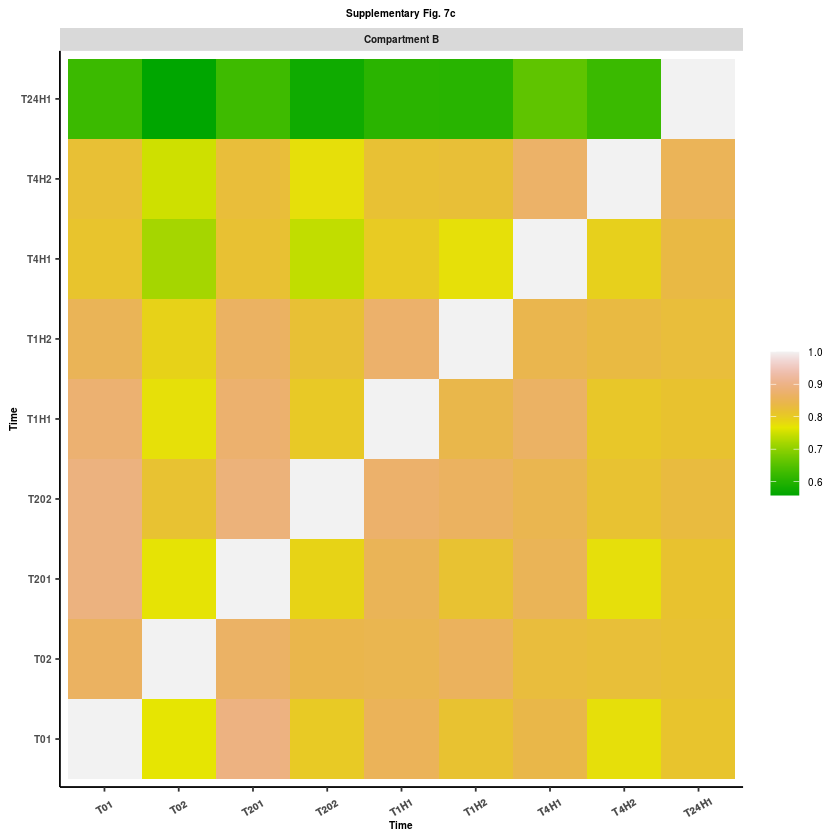

In [17]:
ggplot(data=subset(data_forplot, data_forplot$label %in% 'Compartment B'), aes(x=x,y=y, z=as.numeric(z), fill=as.numeric(z), group=label)) + geom_raster( hjust=0.5, vjust=0.5) + 
  scale_fill_gradientn(colours = terrain.colors(20)) + xlab('Time') + ylab('Time') + theme(
  # Remove panel borde
  #panel.border = element_blank(),  
  # Remove panel grid lines
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Remove panel background
  panel.background = element_blank(),
  # Add axis line
  legend.title=element_blank(),legend.text=element_text(size=6),legend.position='right',
  axis.title=element_text(size=6,face="bold", hjust=0.5),
  plot.title=element_text(size=6,face="bold", hjust=0.5),

  axis.text.x = element_text(hjust = 0.5, vjust=0.5, size=6, face="bold", angle=30),
  axis.text.y = element_text(size=6, face="bold"),
  strip.text = element_text(size=6, face="bold"),
  axis.line = element_line(colour = "black")) + ggtitle('Supplementary Fig. 7c') + facet_grid(.~label)
